<a href="https://colab.research.google.com/github/william-screen/iu-data-science-information-visualization-583/blob/master/client-project/dysmenorrhea-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-Mining of User-Generated Queries on Menstrual Pain

Visualizing a collection of Dysmenorrhea related posts by age, geographic, sentiment and chronological trends

By:  [Ashok Reddy Singam](asingam@iu.edu), [Bill Screen](wscreen@iu.edu) , [Ha-Lan Nguyen](nguyenhl@iu.edu) , [Sunanda Unni](suunni@iu.edu) | Indiana University

### What is Dysmenorrhea and why should you care?

Dysmenorrhea [dis-men-uh-ree-uh] is the medical term for menstrual cramps. It is the leading cause of recurrent short-term school absence in adolescent girls and a common symptom for women of reproductive age.[10]. In the workplace, a BBC survey indicated that 50% of female workers experienced 'period pain' that affected performace on the job. [12] Many women who experience dysmenorrhea seek solutions outside of their doctors office and turn to Internet websites for answers. The objective of this project is to discover key insights for women experiencing dysmenorrhea by performing text-mining on a large dataset of dysmenorrhea related questions posted on a popular question-and-answer website[13]. The scope of analysis will involve examining selected *questions* by: age, geography, sentiment and chronological trends. 

#### Import Libraries and Load Data sets

In [0]:
# Import Libraries

%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import io
import requests
import urllib
from datetime import datetime

# Load data file into pandas Dataframe
df_dysmenorrhea_posts_female = pd.read_csv('dysmenorrhea_posts_female.csv')
#df_dysmenorrhea_posts_male = pd.read_csv('dysmenorrhea_posts_male.csv')

###  Dysmenorrhea and age


In today's modern society, the average woman's reproductive years are between ages 12 and 51, which means that the **average woman will spend nearly ten years of her life menstruating and experience about 450 periods over her lifetime.**[11]  Given the journey from the 'first period' to menopause is a personal adventure, reaching menopause is somewhat analagous to learning to drive a car - challenging in the beginning but less difficult over time. An example of this concept can been seen in the data by observing the high number of questions posted shortly after the 'first period' and the low number of questions leading to perimenopause and menopause. Comparable models to this concept can be seen in Psychology as the 'Power law of practice' and the Learning Curve. Therefore, the data suggests that the more menstral cramps one experiences, the less questions one posts.

#### Group by Age

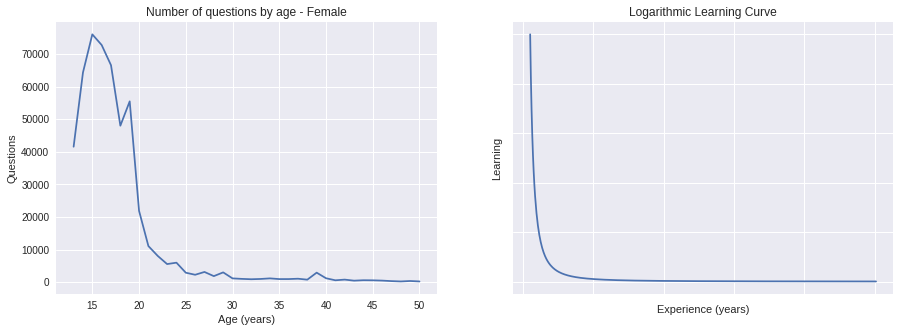

In [88]:
# Group female posts by age
female_age_df = df_dysmenorrhea_posts_female.groupby(['age'])['age'].count()

# Plot 2-column graph for side-by-side comparisson
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Plot female posts by age
ax1.plot(female_age_df)
ax1.set(xlabel='Age (years)', ylabel='Questions',
       title='Number of questions by age - Female')

# Plot simple Inverse curve to illustrate Learning Curve
# Arbitrary stop and step values
x = np.arange(1,16*np.pi,0.1) #start,stop,step
y = 1/(x**2)

ax2.plot(x,y)
ax2.set(xlabel='Experience (years)', ylabel='Learning',
       title='Logarithmic Learning Curve')

# Turn off tick labels

ax2.set_yticklabels([])
ax2.set_xticklabels([])

# Render plot
plt.show()

###  Sentiment Analysis of radomly selected Dysmenorrhea posts

If women who have more experience with dysmenorrhea post fewer questions related to menstral cramps, is there a measurable variance in the verbal tone, feeling, opinion, or sentiment in their posts? To analyze this question, we used Sentiment Analysis (aka Opinion Mining) - a discipline within Natural Language Processing (NLP) that uses algorithms to identify and extract 'opinions' (subjective or objective expressions) within text to quantify sentiment. [15]. To calcuate the sentiment scores for the questions posted in the Dysmenorrhea dataset, we used 
the Microsoft Cognitive Sentitment Analysis API service. It provides clients with the ability to send a body of text and have its sentiment scored between 0.0 (negative) and 1.0 (positive), with 0.5 as a neutral sentiment. According to Microsoft ' Sentiment score is generated using classification techniques. The input features of the classifier include n-grams, features generated from part-of-speech tags, and word embeddings.' [14]. The following table illustrates selected questions from the data set and their corresponding score and polarity.


| Question | Sentiment Score | Sentiment Polarity
| :- | :- | :- |
| What's a great natural remedy for cramps? |  0.9238 | Positive
| Is it normal to have mild cramping when you are 13 weeks pregnant? |  0.5 | Neutral
| I am having really painful abdominal cramps and I don't know why or how to get rid of them. Help!!! |  0.0286 | Negative

<br/>
Given that the discomfort level of dysmenorrhea is subjective, and often varies based on number of experiences, we measured the sentiment score of 250 random questions from each age group to determine if there is an appreciable variation in the average sentiment scores between age groups. Based on analysis of mean sentiment scores (Low:0.1267, High: 0.1735) across all age group, the was no substantial variance in sentiment, therefore on average, all age groups showed a strong negative sentiment when posting dysmenorrhea related questions.



In [130]:
# Load CSV data from Github
url_female_sentiment_0_17 = "https://raw.githubusercontent.com/william-screen/iu-data-science-information-visualization-583/master/client-project/data/female_semantic_analysis_random_0_17.csv"
url_female_sentiment_18_24 = "https://raw.githubusercontent.com/william-screen/iu-data-science-information-visualization-583/master/client-project/data/female_semantic_analysis_random_18_24.csv"
url_female_sentiment_25_34 = "https://raw.githubusercontent.com/william-screen/iu-data-science-information-visualization-583/master/client-project/data/female_semantic_analysis_random_25_34.csv"
url_female_sentiment_35_44 = "https://raw.githubusercontent.com/william-screen/iu-data-science-information-visualization-583/master/client-project/data/female_semantic_analysis_random_35_44.csv"
url_female_sentiment_45_54 = "https://raw.githubusercontent.com/william-screen/iu-data-science-information-visualization-583/master/client-project/data/female_semantic_analysis_random_45_54.csv"

df_female_sentiment_0_17 = pd.read_csv(url_female_sentiment_0_17, sep=',')
df_female_sentiment_18_24 = pd.read_csv(url_female_sentiment_18_24, sep=',')
df_female_sentiment_25_34 = pd.read_csv(url_female_sentiment_25_34, sep=',')
df_female_sentiment_35_44 = pd.read_csv(url_female_sentiment_35_44, sep=',')
df_female_sentiment_45_54 = pd.read_csv(url_female_sentiment_45_54, sep=',')

# Create list of sentiment scores
data = [df_female_sentiment_0_17['documents.score']
        ,df_female_sentiment_18_24['documents.score']
        ,df_female_sentiment_25_34['documents.score']
        ,df_female_sentiment_35_44['documents.score']
        ,df_female_sentiment_45_54['documents.score']]

data_cols = ['0-17', '18-24', '25-34', '35-44', '45-54']
data_rows = ['Min', '25%', 'Mean', '50%', '75%', 'Max', 'Std']

# Calcuate stats aggregates
data_max = [round(x.max(),4) for x in data]
data_avg = [round(x.mean(),4) for x in data]
data_min = [round(x.min(),4) for x in data]
data_std = [round(x.std(),4) for x in data]
data_qrtl_25 = [round(x.quantile(0.25),4) for x in data]
data_qrtl_50 = [round(x.quantile(0.50),4) for x in data]
data_qrtl_75 = [round(x.quantile(0.75),4) for x in data]

# Define a dictionary containing sentiment statistical score data 
data_stats = [data_min, data_qrtl_25, data_avg, data_qrtl_50, data_qrtl_75,data_max, data_std]

# Create DataFrame
df_sentiment_data = pd.DataFrame(data_stats, index=data_rows, columns=data_cols)

# Print DataFrame
print(df_sentiment_data)

        0-17   18-24   25-34   35-44   45-54
Min   0.0014  0.0000  0.0001  0.0000  0.0000
25%   0.0630  0.0527  0.0562  0.0476  0.0429
Mean  0.1545  0.1735  0.1724  0.1442  0.1267
50%   0.1000  0.1178  0.0895  0.0860  0.0891
75%   0.1643  0.1907  0.1456  0.1523  0.1387
Max   1.0000  0.9751  0.9975  0.9987  0.9619
Std   0.1887  0.2061  0.2315  0.1955  0.1672


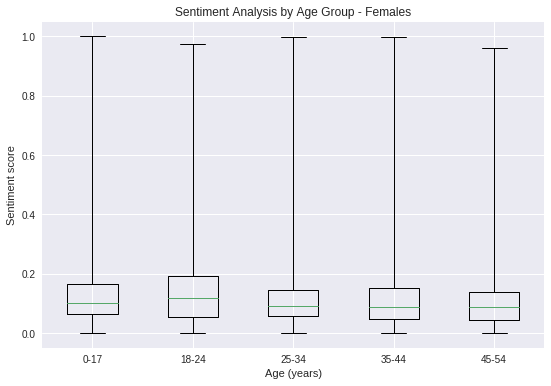

In [131]:

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data, whis=[0, 100], showfliers=True, labels=data_cols)

ax.set(xlabel='Age (years)', ylabel='Sentiment score',
       title='Sentiment Analysis by Age Group - Females')

plt.show()


#### References
[15] https://monkeylearn.com/sentiment-analysis/